In [76]:
import pandas as pd
from pandas import Series,DataFrame

In [77]:
titanic_df = pd.read_csv('C:/Users/kalya/Titanic_train.csv')

In [78]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [79]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
5.) What factors helped someone survive the sinking?

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
titanic_df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

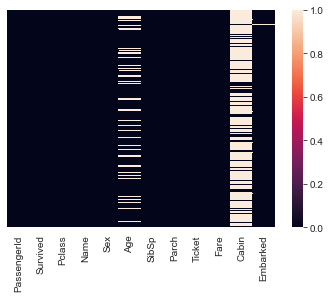

In [82]:
sns.heatmap(titanic_df.isnull(),yticklabels = False,)

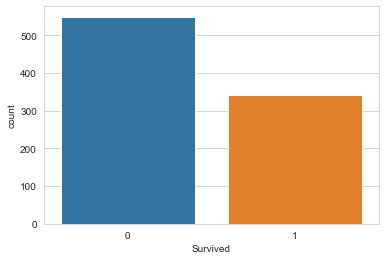

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df)


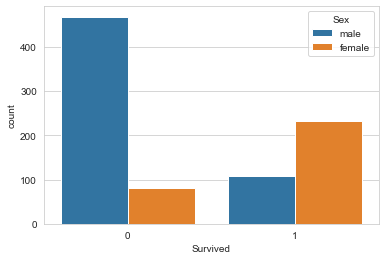

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df,hue='Sex')

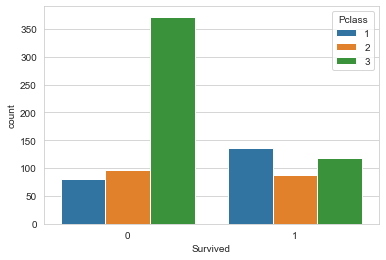

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = titanic_df,hue='Pclass')

In [12]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column


# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [13]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

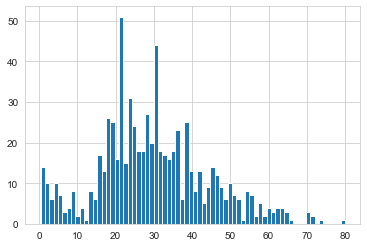

In [14]:
 #Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

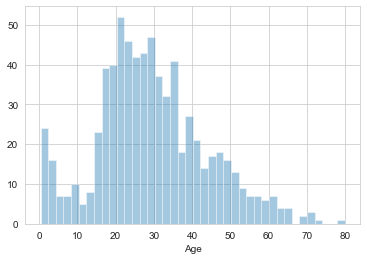

In [15]:
sns.distplot(titanic_df['Age'].dropna(),kde=False,bins=40)

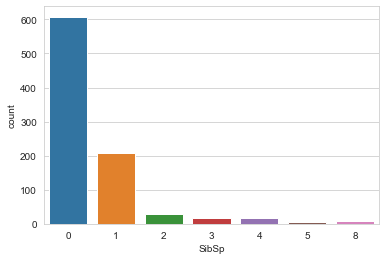

In [16]:
sns.countplot(x='SibSp',data=titanic_df)

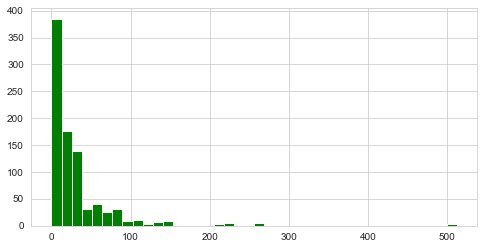

In [17]:
titanic_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

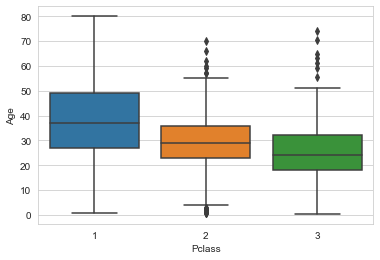

In [18]:
#DataCleaning
sns.boxplot(x='Pclass',y='Age',data=titanic_df)

In [19]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

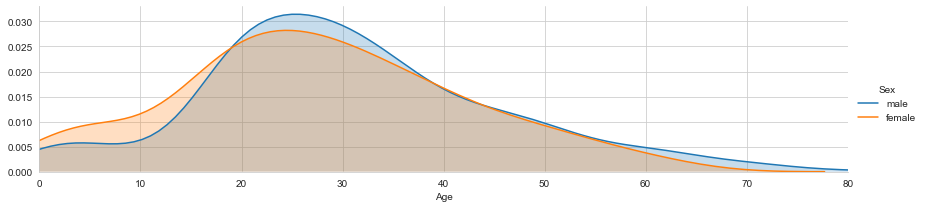

In [20]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)
# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()
#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

In [89]:
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [90]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked        Alone  
0      0         A/5 21171   7.2500   NaN        S  With Family  
1      0          PC 17599  71.2833   C85        C  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S        Alone  
3      0            113803  53.1000  C123        S  With Family  
4      0            373450   8.0500   NaN        S        Alone

In [94]:
# Now let's get a simple visualization!
sns.catplot(x="alone", col="deck", col_wrap=4,
                data=titanic_df[titanic_df.deck.notnull()],
                kind="count", height=2.5, aspect=.8)

AttributeError: 'DataFrame' object has no attribute 'deck'

In [22]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [23]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  person  
0      0         A/5 21171   7.2500        S    male  
1      0          PC 17599  71.2833        C  female  
2      0  STON/O2. 3101282   7.9250        S  female  
3      0            113803  53.1000        S  female  
4      0            373450   8.0500        S    male

In [24]:
titanic_df.dropna(inplace=True)

#Converting Categorical features

In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  person       712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [32]:
embarked =pd.get_dummies(titanic_df['Embarked'],drop_first = True).head()


In [33]:
sex = pd.get_dummies(titanic_df['Sex'],drop_first =True).head()

In [34]:
titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [35]:
titanic_df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  person
0            1         0       3  22.0      1      0   7.2500    male
1            2         1       1  38.0      1      0  71.2833  female
2            3         1       3  26.0      0      0   7.9250  female
3            4         1       1  35.0      1      0  53.1000  female
4            5         0       3  35.0      0      0   8.0500    male

In [37]:
titanic_df = pd.concat([titanic_df,sex,embarked],axis=1)

In [75]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

KeyError: 'Cabin'

# Logistic Regression

In [59]:
titanic_df.drop(['Survived','male','person'],axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare    Q    S
0            1       3  22.0      1      0   7.2500  0.0  1.0
1            2       1  38.0      1      0  71.2833  0.0  0.0
2            3       3  26.0      0      0   7.9250  0.0  1.0
3            4       1  35.0      1      0  53.1000  0.0  1.0
4            5       3  35.0      0      0   8.0500  0.0  1.0

In [66]:
titanic_df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  person  male  \
0            1         0       3  22.0      1      0   7.2500    male   1.0   
1            2         1       1  38.0      1      0  71.2833  female   0.0   
2            3         1       3  26.0      0      0   7.9250  female   0.0   
3            4         1       1  35.0      1      0  53.1000  female   0.0   
4            5         0       3  35.0      0      0   8.0500    male   1.0   

     Q    S  
0  0.0  1.0  
1  0.0  0.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0

In [60]:
titanic_df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'dropisna'

In [62]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop(['Survived','male','person'],axis=1), 
                                                    titanic_df['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and predicting

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').